In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

sns.set()
%matplotlib inline

In [3]:
raw_data = pd.read_csv('Datasets/Real_Life_LN_R.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Exploring the Descriptive Statistics of the Variables

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# A lot of the information from 'Model' could be engineered from 'Brand', 'Year', abd 'EngineV' so we won't be losing too much variability.

In [6]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


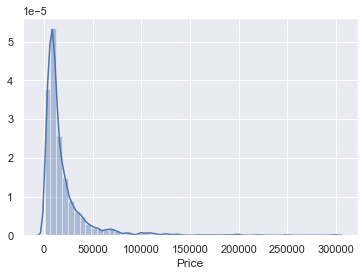

In [10]:
sns.distplot(data_no_mv['Price'])

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


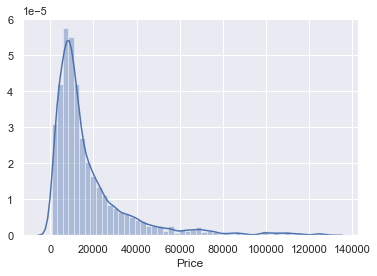

In [12]:
sns.distplot(data_1['Price'])

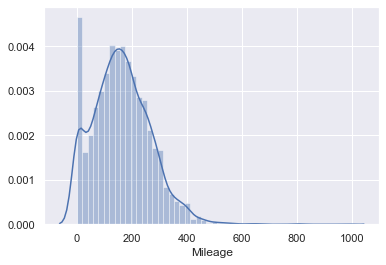

In [13]:
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

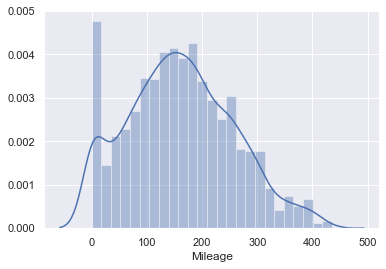

In [15]:
sns.distplot(data_2['Mileage'])

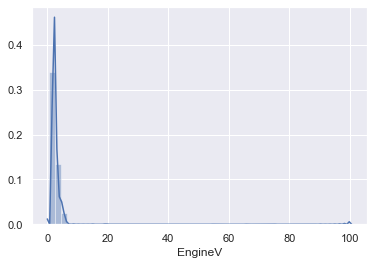

In [16]:
sns.distplot(data_no_mv['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV'] < 6.5]

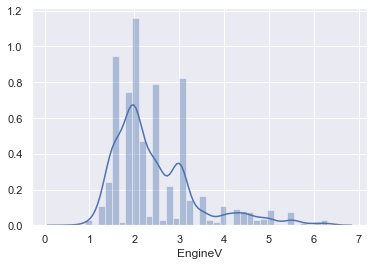

In [18]:
sns.distplot(data_3['EngineV'])

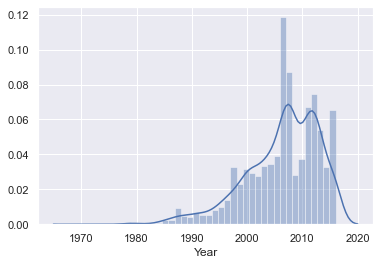

In [19]:
sns.distplot(data_no_mv['Year'])

In [20]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

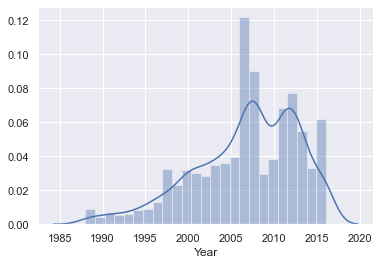

In [21]:
sns.distplot(data_4['Year'])

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# Checking the OLS Assumptions

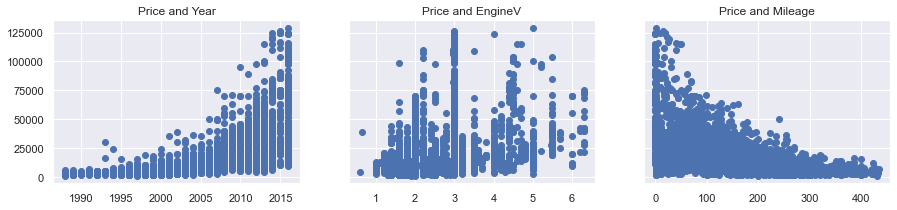

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize= (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

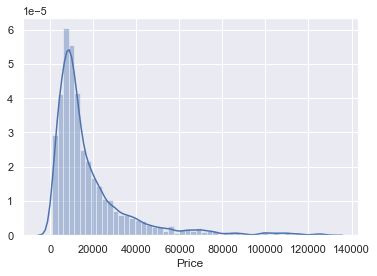

In [25]:
sns.distplot(data_cleaned['Price'])

### Price is not normally distributed, and from there its relationship with other normally distributed features are not linear.

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


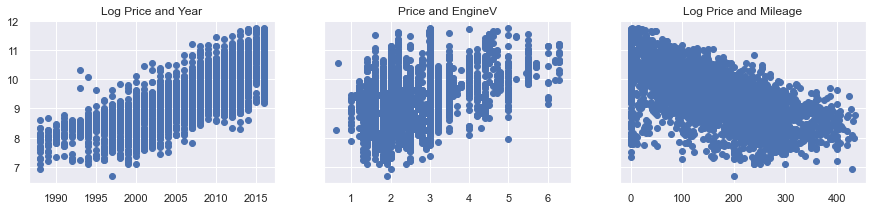

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize= (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [28]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [29]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### Multicollinearity

In [30]:
data_cleaned.columns.values
# It is logical that 'Year' and 'Mileage' will be correlated

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [32]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [33]:
data_no_multicollinearlity = data_cleaned.drop(['Year'], axis=1)

### Create a Dummy Variables

In [34]:
data_with_dummies = pd.get_dummies(data_no_multicollinearlity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


### Rearrange a bit

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression Model

#### Declare the inputs and the targets

In [39]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=2020)

In [42]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_hat = reg.predict(x_train)

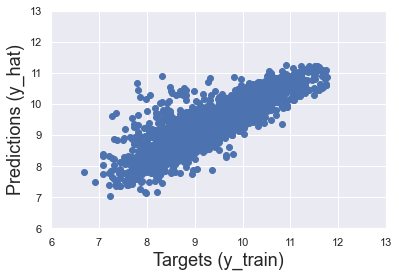

In [44]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show();

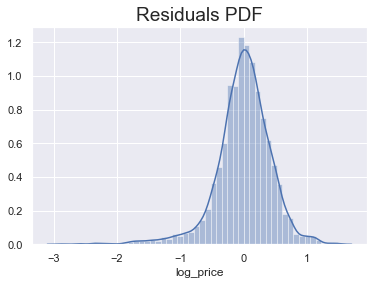

In [45]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=19);

In [46]:
reg.score(x_train, y_train)

0.7464778806767052

### Finding the Weights and Bias

In [47]:
reg.intercept_

9.414035363769079

In [48]:
reg.coef_

array([-0.45812576,  0.21473215,  0.01681308,  0.00825161, -0.13529957,
       -0.17390023, -0.0557251 , -0.08559659, -0.14502961, -0.09858757,
       -0.19493758, -0.12472641, -0.1606656 , -0.11966762, -0.02454336,
       -0.14095293,  0.31066305])

In [49]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458126
1,EngineV,0.214732
2,Brand_BMW,0.016813
3,Brand_Mercedes-Benz,0.008252
4,Brand_Mitsubishi,-0.135300
5,Brand_Renault,-0.173900
6,Brand_Toyota,-0.055725
7,Brand_Volkswagen,-0.085597
8,Body_hatch,-0.145030
9,Body_other,-0.098588


In [50]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [51]:
y_hat_test = reg.predict(x_test)

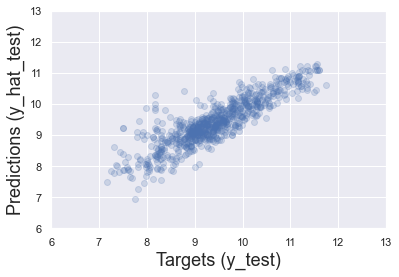

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show();

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7251.721486
1,3661.538390
2,6237.768900
3,7183.094764
4,15010.371109


In [54]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.457200
1       7.863267
2       8.824678
3       8.787983
4       9.975808
         ...    
769     9.898475
770     9.137770
771     9.525151
772     9.998798
773    10.709963
Name: log_price, Length: 774, dtype: float64

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7251.721486,12800.0
1,3661.538390,2600.0
2,6237.768900,6800.0
3,7183.094764,6555.0
4,15010.371109,21500.0
...,...,...
769,15197.837045,19900.0
770,9655.404548,9300.0
771,18624.613487,13700.0
772,11210.509550,22000.0


In [56]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residual
0,7251.721486,12800.0,5548.278514
1,3661.538390,2600.0,-1061.538390
2,6237.768900,6800.0,562.231100
3,7183.094764,6555.0,-628.094764
4,15010.371109,21500.0,6489.628891


In [57]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)

In [58]:
df_pf

,Prediction,Target,Residual,Difference%
0,7251.721486,12800.0,5548.278514,43.345926
1,3661.538390,2600.0,-1061.538390,40.828400
2,6237.768900,6800.0,562.231100,8.268104
3,7183.094764,6555.0,-628.094764,9.581919
4,15010.371109,21500.0,6489.628891,30.184320
...,...,...,...,...
769,15197.837045,19900.0,4702.162955,23.628960
770,9655.404548,9300.0,-355.404548,3.821554
771,18624.613487,13700.0,-4924.613487,35.946084
772,11210.509550,22000.0,10789.490450,49.043138


In [59]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16312.242348,18664.875801,2352.633453,37.516205
std,13767.019838,20067.790319,10196.735942,61.353961
min,1019.903504,1300.000000,-26418.532353,0.055920
25%,7766.094414,7199.250000,-1924.101968,12.334155
50%,11397.215912,11700.000000,357.276624,24.402056
75%,20355.613023,21775.000000,3713.700897,40.578192
max,78614.909441,125000.000000,85301.554413,722.823670


In [61]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f'% x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
655,6503.63,6500.00,-3.63,0.06
208,8983.81,9000.00,16.19,0.18
254,8916.95,8900.00,-16.95,0.19
299,22637.81,22711.65,73.84,0.33
723,35690.10,35500.00,-190.10,0.54
537,23150.88,22999.00,-151.88,0.66
498,18650.08,18800.00,149.92,0.80
30,2872.95,2900.00,27.05,0.93
561,39106.86,39500.00,393.14,1.00
262,9692.23,9800.00,107.77,1.10
